In [18]:
import pandas_datareader.data as web
import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import datetime
import pandas_datareader as web

In [27]:
columns = ["REPORT_DAT", "SHIFT", "OFFENSE", "METHOD", "NEIGHBORHOOD_CLUSTER", "crimetype"]

In [28]:
#Load data
file_path = Path('dc_crime_add_vars.csv')
dc_crime_df = pd.read_csv(file_path, skiprows=0)[:-2]

dc_crime_df = dc_crime_df.loc[:, columns].copy()
dc_crime_df = dc_crime_df.dropna(axis='columns', how='all')

#drop the null rows:
dc_crime_df = dc_crime_df.dropna()

dc_crime_df

,REPORT_DAT,SHIFT,OFFENSE,METHOD,NEIGHBORHOOD_CLUSTER,crimetype
0,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,Cluster 4,Non-Violent
1,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,Cluster 6,Non-Violent
2,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,Cluster 8,Non-Violent
3,9/9/2008 7:46:00 AM,DAY,THEFT/OTHER,OTHERS,Cluster 6,Non-Violent
4,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,Cluster 8,Non-Violent
...,...,...,...,...,...,...
342860,1/10/2008 2:25:00 PM,DAY,THEFT/OTHER,OTHERS,Cluster 2,Non-Violent
342861,1/10/2008 3:15:00 PM,EVENING,THEFT/OTHER,OTHERS,Cluster 1,Non-Violent
342862,3/21/2008 1:00:00 PM,DAY,MOTOR VEHICLE THEFT,OTHERS,Cluster 3,Non-Violent
342863,3/21/2008 9:08:00 PM,EVENING,THEFT/OTHER,OTHERS,Cluster 2,Non-Violent


In [23]:
result = dc_crime_df.dtypes
result

REPORT_DAT              object
SHIFT                   object
OFFENSE                 object
METHOD                  object
NEIGHBORHOOD_CLUSTER    object
dtype: object

In [24]:
#dc_crime_df.index = pd.to_datetime(dc_crime_df['REPORT_DAT']) #format='%m/%d/%Y %H:%M:%S')
#del dc_crime_df['REPORT_DAT']
#dc_crime_df

In [29]:
offense_counts = dc_crime_df.OFFENSE.value_counts()
offense_counts

THEFT/OTHER                   128433
THEFT F/AUTO                   84437
ROBBERY                        34745
MOTOR VEHICLE THEFT            32631
BURGLARY                       30914
ASSAULT W/DANGEROUS WEAPON     23104
SEX ABUSE                       2356
HOMICIDE                        1222
ARSON                            318
Name: OFFENSE, dtype: int64

In [30]:
type_counts = dc_crime_df.crimetype.value_counts()
type_counts

Non-Violent    276733
Violent         61427
Name: crimetype, dtype: int64

<AxesSubplot:ylabel='Density'>

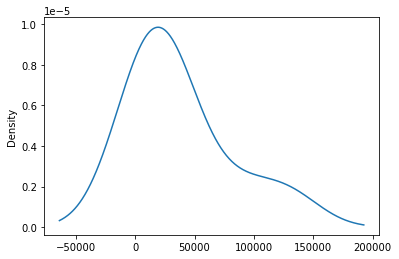

In [8]:
offense_counts.plot.density()

In [9]:
# Determine which values to replace
replace_offenses = list(offense_counts[offense_counts < 30000].index)

# Replace in Dataframe
for offense in replace_offenses:
    dc_crime_df.OFFENSE = dc_crime_df.OFFENSE.replace(offense, "Other")
    
# Check to make sure binning was successful
dc_crime_df.OFFENSE.value_counts()

THEFT/OTHER            128433
THEFT F/AUTO            84437
ROBBERY                 34745
MOTOR VEHICLE THEFT     32631
BURGLARY                30914
Other                   27000
Name: OFFENSE, dtype: int64

In [10]:
# Create OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)

#Fit the encoder and produce encoded DataFrame
offense_encode_df = pd.DataFrame(enc.fit_transform(dc_crime_df.OFFENSE.values.reshape(-1,1)))

# Rename encoded columns
offense_encode_df.columns = enc.get_feature_names_out(['OFFENSE'])
offense_encode_df

,OFFENSE_BURGLARY,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_Other,OFFENSE_ROBBERY,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
338155,0.0,0.0,0.0,0.0,0.0,1.0
338156,0.0,0.0,0.0,0.0,0.0,1.0
338157,0.0,1.0,0.0,0.0,0.0,0.0
338158,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# Merge the two DataFrames together and drop the OFFENSE column
dc_crime_df.merge(offense_encode_df,left_index=True,right_index=True).drop("OFFENSE", 1)

C:\Users\fredr\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,REPORT_DAT,SHIFT,METHOD,NEIGHBORHOOD_CLUSTER,crimetype,OFFENSE_BURGLARY,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_Other,OFFENSE_ROBBERY,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER
0,8/31/2008 8:47:00 PM,EVENING,OTHERS,Cluster 4,Non-Violent,0.0,0.0,0.0,0.0,0.0,1.0
1,9/1/2008 12:45:00 AM,MIDNIGHT,OTHERS,Cluster 6,Non-Violent,0.0,1.0,0.0,0.0,0.0,0.0
2,9/1/2008 3:00:00 AM,MIDNIGHT,OTHERS,Cluster 8,Non-Violent,0.0,0.0,0.0,0.0,0.0,1.0
3,9/9/2008 7:46:00 AM,DAY,OTHERS,Cluster 6,Non-Violent,0.0,0.0,0.0,0.0,0.0,1.0
4,8/24/2008 8:00:00 PM,EVENING,OTHERS,Cluster 8,Non-Violent,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
338154,7/9/2016 4:16:37 PM,EVENING,OTHERS,Cluster 1,Non-Violent,0.0,0.0,0.0,0.0,0.0,1.0
338156,7/21/2016 2:18:11 PM,DAY,OTHERS,Cluster 3,Non-Violent,0.0,0.0,0.0,0.0,0.0,1.0
338157,7/21/2016 6:48:25 PM,EVENING,OTHERS,Cluster 2,Non-Violent,0.0,1.0,0.0,0.0,0.0,0.0
338158,8/2/2016 12:00:00 AM,MIDNIGHT,KNIFE,Cluster 2,Violent,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
dc_crime_df.index = pd.to_datetime(dc_crime_df['REPORT_DAT']) #format='%m/%d/%Y %H:%M:%S')

dc_crime_df

,REPORT_DAT,SHIFT,OFFENSE,METHOD,NEIGHBORHOOD_CLUSTER,crimetype
REPORT_DAT,,,,,,
2008-08-31 20:47:00,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,Cluster 4,Non-Violent
2008-09-01 00:45:00,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,Cluster 6,Non-Violent
2008-09-01 03:00:00,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,Cluster 8,Non-Violent
2008-09-09 07:46:00,9/9/2008 7:46:00 AM,DAY,THEFT/OTHER,OTHERS,Cluster 6,Non-Violent
2008-08-24 20:00:00,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,Cluster 8,Non-Violent
...,...,...,...,...,...,...
2008-01-10 14:25:00,1/10/2008 2:25:00 PM,DAY,THEFT/OTHER,OTHERS,Cluster 2,Non-Violent
2008-01-10 15:15:00,1/10/2008 3:15:00 PM,EVENING,THEFT/OTHER,OTHERS,Cluster 1,Non-Violent
2008-03-21 13:00:00,3/21/2008 1:00:00 PM,DAY,MOTOR VEHICLE THEFT,OTHERS,Cluster 3,Non-Violent


In [13]:
dumvar_crime_df=pd.get_dummies(dc_crime_df, columns=['SHIFT', 'OFFENSE', 'METHOD', 'NEIGHBORHOOD_CLUSTER', 'crimetype'])
dumvar_crime_df

,REPORT_DAT,SHIFT_DAY,SHIFT_EVENING,SHIFT_MIDNIGHT,OFFENSE_BURGLARY,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_Other,OFFENSE_ROBBERY,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER,...,NEIGHBORHOOD_CLUSTER_Cluster 38,NEIGHBORHOOD_CLUSTER_Cluster 39,NEIGHBORHOOD_CLUSTER_Cluster 4,NEIGHBORHOOD_CLUSTER_Cluster 5,NEIGHBORHOOD_CLUSTER_Cluster 6,NEIGHBORHOOD_CLUSTER_Cluster 7,NEIGHBORHOOD_CLUSTER_Cluster 8,NEIGHBORHOOD_CLUSTER_Cluster 9,crimetype_Non-Violent,crimetype_Violent
REPORT_DAT,,,,,,,,,,,,,,,,,,,,,
2008-08-31 20:47:00,8/31/2008 8:47:00 PM,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2008-09-01 00:45:00,9/1/2008 12:45:00 AM,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2008-09-01 03:00:00,9/1/2008 3:00:00 AM,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2008-09-09 07:46:00,9/9/2008 7:46:00 AM,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2008-08-24 20:00:00,8/24/2008 8:00:00 PM,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-01-10 14:25:00,1/10/2008 2:25:00 PM,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2008-01-10 15:15:00,1/10/2008 3:15:00 PM,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2008-03-21 13:00:00,3/21/2008 1:00:00 PM,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
dumvar_crime_df['REPORT_DAT'] = pd.to_datetime(dumvar_crime_df['REPORT_DAT'])
dumvar_crime_df

,REPORT_DAT,SHIFT_DAY,SHIFT_EVENING,SHIFT_MIDNIGHT,OFFENSE_BURGLARY,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_Other,OFFENSE_ROBBERY,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER,...,NEIGHBORHOOD_CLUSTER_Cluster 38,NEIGHBORHOOD_CLUSTER_Cluster 39,NEIGHBORHOOD_CLUSTER_Cluster 4,NEIGHBORHOOD_CLUSTER_Cluster 5,NEIGHBORHOOD_CLUSTER_Cluster 6,NEIGHBORHOOD_CLUSTER_Cluster 7,NEIGHBORHOOD_CLUSTER_Cluster 8,NEIGHBORHOOD_CLUSTER_Cluster 9,crimetype_Non-Violent,crimetype_Violent
REPORT_DAT,,,,,,,,,,,,,,,,,,,,,
2008-08-31 20:47:00,2008-08-31 20:47:00,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2008-09-01 00:45:00,2008-09-01 00:45:00,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2008-09-01 03:00:00,2008-09-01 03:00:00,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2008-09-09 07:46:00,2008-09-09 07:46:00,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2008-08-24 20:00:00,2008-08-24 20:00:00,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-01-10 14:25:00,2008-01-10 14:25:00,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2008-01-10 15:15:00,2008-01-10 15:15:00,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2008-03-21 13:00:00,2008-03-21 13:00:00,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
sns.set()

In [17]:
plt.ylabel('crimetype')
plt.xlabel('REPORT_DAT')
plt.xticks(rotation=45)
plt.plot(dc_crime_df['REPORT_DAT'], dc_crime_df['OFFENSE'])

Error in callback <function flush_figures at 0x000002EF49AD1F78> (for post_execute):


KeyboardInterrupt: 